## **PREDICTING THE 'GAS TURBINE DEGRADATION STATE COEFFICIENT'**

# **DATA DESCRIPTION**

The experiments have been carried out by means of a numerical simulator of a naval vessel (Frigate) characterized by a Gas Turbine (GT) propulsion plant. The different blocks forming the complete simulator (Propeller, Hull, GT, Gear Box and Controller) have been developed and fine tuned over the year on several similar real propulsion plants. In view of these observations the available data are in agreement with a possible real vessel.
In this release of the simulator it is also possible to take into account the performance decay over time of the GT components such as GT compressor and turbines.
The propulsion system behaviour has been described with this parameters:
- Ship speed (linear function of the lever position lp).
- Compressor degradation coefficient kMc.
- Turbine degradation coefficient kMt.


so that each possible degradation state can be described by a combination of this triple (lp,kMt,kMc).

# **DATA HANDLING**

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
from google.colab import files
uploaded = files.upload()

Saving naval_vessel (2).csv to naval_vessel (2) (6).csv


In [ ]:
naval_vessel= pd.read_csv('naval_vessel (2).csv',names = ['Lever position','Ship speed','Gas Turbine (GT) shaft torque','GT rate of revolutions','Gas Generator rate of revolutions','Starboard Propeller Torque','Port Propeller Torque','Hight Pressure (HP) Turbine exit temperature' ,'GT Compressor inlet air temperature','GT Compressor outlet air temperature','HP Turbine exit pressure' ,'GT Compressor inlet air pressure','GT Compressor outlet air pressure' ,'GT exhaust gas pressure','Turbine Injecton Control','Fuel flow','GT Compressor decay state coefficient','GT Turbine decay state coefficient '])
naval_vessel.head()

,Lever position,Ship speed,Gas Turbine (GT) shaft torque,GT rate of revolutions,Gas Generator rate of revolutions,Starboard Propeller Torque,Port Propeller Torque,Hight Pressure (HP) Turbine exit temperature,GT Compressor inlet air temperature,GT Compressor outlet air temperature,HP Turbine exit pressure,GT Compressor inlet air pressure,GT Compressor outlet air pressure,GT exhaust gas pressure,Turbine Injecton Control,Fuel flow,GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,288.0,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,288.0,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,288.0,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,288.0,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,288.0,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


In [61]:
naval_vessel.shape

(11933, 18)

In [62]:
naval_vessel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Lever position                                11933 non-null  float64
 1   Ship speed                                    11933 non-null  float64
 2   Gas Turbine (GT) shaft torque                 11933 non-null  float64
 3   GT rate of revolutions                        11933 non-null  float64
 4   Gas Generator rate of revolutions             11933 non-null  float64
 5   Starboard Propeller Torque                    11933 non-null  float64
 6   Port Propeller Torque                         11933 non-null  float64
 7   Hight Pressure (HP) Turbine exit temperature  11933 non-null  float64
 8   GT Compressor inlet air temperature           11933 non-null  float64
 9   GT Compressor outlet air temperature          11933 non-null 

In [63]:
naval_vessel.dtypes

Lever position                                  float64
Ship speed                                      float64
Gas Turbine (GT) shaft torque                   float64
GT rate of revolutions                          float64
Gas Generator rate of revolutions               float64
Starboard Propeller Torque                      float64
Port Propeller Torque                           float64
Hight Pressure (HP) Turbine exit temperature    float64
GT Compressor inlet air temperature             float64
GT Compressor outlet air temperature            float64
HP Turbine exit pressure                        float64
GT Compressor inlet air pressure                float64
GT Compressor outlet air pressure               float64
GT exhaust gas pressure                         float64
Turbine Injecton Control                        float64
Fuel flow                                       float64
GT Compressor decay state coefficient           float64
GT Turbine decay state coefficient              

In [64]:
naval_vessel.describe()

,Lever position,Ship speed,Gas Turbine (GT) shaft torque,GT rate of revolutions,Gas Generator rate of revolutions,Starboard Propeller Torque,Port Propeller Torque,Hight Pressure (HP) Turbine exit temperature,GT Compressor inlet air temperature,GT Compressor outlet air temperature,HP Turbine exit pressure,GT Compressor inlet air pressure,GT Compressor outlet air pressure,GT exhaust gas pressure,Turbine Injecton Control,Fuel flow,GT Compressor decay state coefficient,GT Turbine decay state coefficient
count,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.0,11933.000000,11933.000000,1.193300e+04,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000
mean,5.167004,15.001006,27249.757760,2136.355191,8201.074989,227.354184,227.354184,735.518197,288.0,646.223347,2.353068,9.980000e-01,12.297655,1.029475,33.643482,0.662488,0.975002,0.987501
std,2.626239,7.745837,22148.166255,774.082804,1091.272098,200.494197,200.494197,173.670045,0.0,72.673651,1.084754,2.533635e-13,5.337355,0.010390,25.841307,0.507125,0.014719,0.007500
min,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,5.304000,442.364000,288.0,540.442000,1.093000,9.980000e-01,5.828000,1.019000,0.000000,0.068000,0.950000,0.975000
25%,3.144000,9.000000,8375.886000,1386.758000,7058.402000,60.317000,60.317000,589.875000,288.0,578.102000,1.389000,9.980000e-01,7.448000,1.020000,13.700000,0.246000,0.962000,0.981000
50%,5.140000,15.000000,21630.666000,1924.326000,8482.088000,175.268000,175.268000,706.048000,288.0,637.142000,2.083000,9.980000e-01,11.092000,1.026000,25.277000,0.496000,0.975000,0.988000
75%,7.148000,21.000000,39001.427000,2678.079000,9132.610000,332.365000,332.365000,834.091000,288.0,693.928000,2.981000,9.980000e-01,15.658000,1.036000,44.553000,0.882000,0.988000,0.994000
max,9.300000,27.000000,72784.872000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,288.0,789.094000,4.560000,9.980000e-01,23.140000,1.052000,92.556000,1.832000,1.000000,1.000000


In [65]:
naval_vessel.value_counts

<bound method DataFrame.value_counts of        Lever position  ...  GT Turbine decay state coefficient
0               2.088  ...                               0.975
1               3.144  ...                               0.975
2               4.161  ...                               0.975
3               5.140  ...                               0.975
4               6.175  ...                               0.975
...               ...  ...                                 ...
11928           5.140  ...                               1.000
11929           6.175  ...                               1.000
11930           7.148  ...                               1.000
11931           8.206  ...                               1.000
11932           9.300  ...                               1.000

[11933 rows x 18 columns]>

In [66]:
naval_vessel.isnull().sum()

Lever position                                  0
Ship speed                                      0
Gas Turbine (GT) shaft torque                   0
GT rate of revolutions                          0
Gas Generator rate of revolutions               0
Starboard Propeller Torque                      0
Port Propeller Torque                           0
Hight Pressure (HP) Turbine exit temperature    0
GT Compressor inlet air temperature             0
GT Compressor outlet air temperature            0
HP Turbine exit pressure                        0
GT Compressor inlet air pressure                0
GT Compressor outlet air pressure               0
GT exhaust gas pressure                         0
Turbine Injecton Control                        0
Fuel flow                                       0
GT Compressor decay state coefficient           0
GT Turbine decay state coefficient              0
dtype: int64

In [67]:
#lambda function : For getting unique values for the columns we pass an anonymous function to apply().
print(naval_vessel.apply(lambda col: col.unique()))

Lever position                                  [2.088, 3.144, 4.161, 5.14, 6.175, 7.148, 8.20...
Ship speed                                      [6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0, 27.0,...
Gas Turbine (GT) shaft torque                   [6960.18, 8379.229, 14724.395, 21636.432, 2979...
GT rate of revolutions                          [1376.166, 1386.757, 1547.465, 1924.313, 2307....
Gas Generator rate of revolutions               [6828.469, 7111.811, 7792.63, 8494.777, 8828.3...
Starboard Propeller Torque                      [28.204, 60.358, 113.774, 175.306, 246.278, 33...
Port Propeller Torque                           [28.204, 60.358, 113.774, 175.306, 246.278, 33...
Hight Pressure (HP) Turbine exit temperature    [635.401, 606.002, 661.471, 731.494, 800.434, ...
GT Compressor inlet air temperature                                                       [288.0]
GT Compressor outlet air temperature            [581.658, 587.587, 613.851, 645.642, 676.397, ...
HP Turbine exit pres

We use lambda functions when we require a nameless function for a short period of time. In Python, we generally use it as an argument to a higher-order function (a function that takes in other functions as arguments). Lambda functions are used along with built-in functions like filter() , map() etc.

axis : {0 or 'index', 1 or 'columns'}, default 0
    Whether to drop labels from the index (0 or 'index') or
columns (1 or 'columns').

In [68]:
##drop columns : GT compressor inlet air temperature , GT compressor inlet air pressure have only one unique value and doesn't contribute to our dataset.
naval_vessel = naval_vessel.drop('GT Compressor inlet air temperature', axis=1)
naval_vessel = naval_vessel.drop('GT Compressor inlet air pressure', axis =1)

In [69]:
naval_vessel.head(3)

,Lever position,Ship speed,Gas Turbine (GT) shaft torque,GT rate of revolutions,Gas Generator rate of revolutions,Starboard Propeller Torque,Port Propeller Torque,Hight Pressure (HP) Turbine exit temperature,GT Compressor outlet air temperature,HP Turbine exit pressure,GT Compressor outlet air pressure,GT exhaust gas pressure,Turbine Injecton Control,Fuel flow,GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,581.658,1.331,7.282,1.019,10.655,0.287,0.95,0.975
1,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,587.587,1.389,7.574,1.020,13.086,0.259,0.95,0.975
2,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,613.851,1.658,9.007,1.022,18.109,0.358,0.95,0.975


# **EXPLORATORY DATA ANALYSIS (EDA)**

In [70]:
import seaborn as sns

pairplot :This is a very simple command that will output a very handy graph showing the relationships between each of our numerical features by pairing each feature with all other features.

In [ ]:
sns.pairplot(naval_vessel ,size =15)

# **CORRELATION**

In [ ]:
correlation = naval_vessel.corr()

In [ ]:
print(correlation['GT Compressor decay state coefficient'])

Lever position                                 -0.000218
Ship speed                                     -0.000221
Gas Turbine (GT) shaft torque                   0.002806
GT rate of revolutions                          0.001225
Gas Generator rate of revolutions              -0.019041
Starboard Propeller Torque                      0.000598
Port Propeller Torque                           0.000598
Hight Pressure (HP) Turbine exit temperature   -0.039857
GT Compressor outlet air temperature           -0.047373
HP Turbine exit pressure                        0.008004
GT Compressor outlet air pressure               0.008160
GT exhaust gas pressure                         0.035148
Turbine Injecton Control                       -0.032188
Fuel flow                                      -0.013833
GT Compressor decay state coefficient           1.000000
GT Turbine decay state coefficient             -0.000237
Name: GT Compressor decay state coefficient, dtype: float64


Heatmap : Correlation heatmap is graphical representation of correlation matrix representing correlation between different variables.

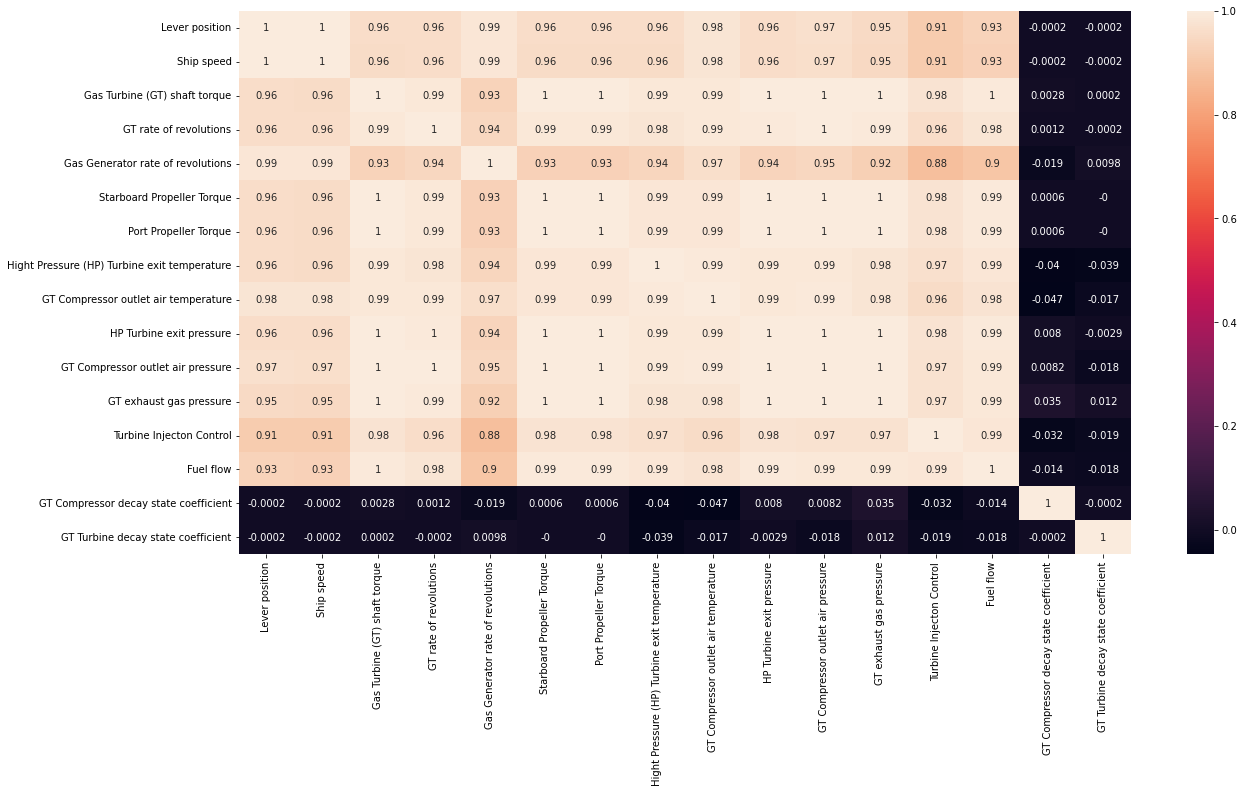

In [ ]:
correlation = np.round(naval_vessel.corr(),4)
plt.figure(figsize = (20,10))
sns.heatmap  (correlation, annot = True) 
#annot: writes the data value in each cell,an array-like with the same shape as data, we use this to annotate the heatmap instead of the data.
plt.show()

# **ALGORITHM**

In [ ]:
 X = naval_vessel[['Lever position','Ship speed','Gas Turbine (GT) shaft torque','GT rate of revolutions','Gas Generator rate of revolutions','Starboard Propeller Torque','Port Propeller Torque','Hight Pressure (HP) Turbine exit temperature','GT Compressor outlet air temperature','HP Turbine exit pressure','GT Compressor outlet air pressure' ,'GT exhaust gas pressure','Turbine Injecton Control','Fuel flow']]
 Y = naval_vessel['GT Compressor decay state coefficient']
 

In [ ]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,Y1_train,Y1_test = train_test_split(X,Y,test_size = 0.20,train_size=0.80)
X2_train,X2_test,Y2_train,Y2_test = train_test_split(X,Y,test_size = 0.25 ,train_size=0.75)
X3_train,X3_test,Y3_train,Y3_test = train_test_split(X,Y,test_size = 0.30 ,train_size=0.70)
X4_train,X4_test,Y4_train,Y4_test = train_test_split(X,Y,test_size = 0.35 ,train_size=0.65)
X5_train,X5_test,Y5_train,Y5_test = train_test_split(X,Y,test_size = 0.40 ,train_size=0.60)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X1_train, Y1_train)
model.fit(X2_train, Y2_train)
model.fit(X3_train, Y3_train)
model.fit(X4_train, Y4_train)
model.fit(X5_train, Y5_train)


LinearRegression()

In [ ]:
Y1_pred = model.predict(X1_test)
Y2_pred = model.predict(X2_test)
Y3_pred = model.predict(X3_test)
Y4_pred = model.predict(X4_test)
Y5_pred = model.predict(X5_test)

# **EVALUATION**

**Accuracy**

In [ ]:
accuracy_1 = print(model.score(X1_test, Y1_test))
accuracy_2 = print(model.score(X2_test, Y2_test))
accuracy_3 = print(model.score(X3_test, Y3_test))
accuracy_4 = print(model.score(X4_test, Y4_test))
accuracy_5 = print(model.score(X5_test, Y5_test))

0.8421110547652861
0.8425009760249637
0.8408590349973225
0.8394333988843725
0.8394707127727106


**Mean Square Error**

In [ ]:
from sklearn.metrics import mean_squared_error
MSE1 = print(mean_squared_error(Y1_pred,Y1_test,squared = False))
MSE2 = print(mean_squared_error(Y2_pred,Y2_test,squared = False))
MSE3 = print(mean_squared_error(Y3_pred,Y3_test,squared = False))
MSE4 = print(mean_squared_error(Y4_pred,Y4_test,squared = False))
MSE5 = print(mean_squared_error(Y5_pred,Y5_test,squared = False))

0.005847192745016396
0.005802342746034789
0.005863433347533859
0.005900827598094188
0.005875358734480831


**R Square**

In [ ]:
from sklearn.metrics import r2_score
R_square1 = print(r2_score(Y1_pred,Y1_test))
R_square2 = print(r2_score(Y2_pred,Y2_test))
R_square3 = print(r2_score(Y3_pred,Y3_test))
R_square4 = print(r2_score(Y4_pred,Y4_test))
R_square5 = print(r2_score(Y5_pred,Y5_test))

0.8136325536683766
0.8131952323387757
0.8115358364712086
0.8074523621013452
0.8099974972472888


**Adjusted R2**

In [ ]:
Adj_R2_1 = print(1 - (1-r2_score(Y1_test, Y1_pred)) * (len(Y)-1)/(len(Y)-X.shape[1]-1))
Adj_R2_2 = print(1 - (1-r2_score(Y2_test, Y2_pred)) * (len(Y)-1)/(len(Y)-X.shape[1]-1))
Adj_R2_3 = print(1 - (1-r2_score(Y3_test, Y3_pred)) * (len(Y)-1)/(len(Y)-X.shape[1]-1))
Adj_R2_4 = print(1 - (1-r2_score(Y4_test, Y4_pred)) * (len(Y)-1)/(len(Y)-X.shape[1]-1))
Adj_R2_5 = print(1 - (1-r2_score(Y5_test, Y5_pred)) * (len(Y)-1)/(len(Y)-X.shape[1]-1))

0.8419255836096152
0.8423159629073558
0.8406720931018671
0.8392447823030988
0.8392821400238281


# **INSIGHTS**

 Linear Regression with 84% seems to be the best model for prediction.